In [87]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [98]:
weekly_df = pd.read_csv('../src/data/weekly_data.csv')
daily_df = pd.read_csv('../src/data/daily_data_with_SP500.csv')
weekly_df.dtypes

ticker_symbol       object
post_date           object
open_value         float64
high_value         float64
low_value          float64
close_value        float64
volume               int64
reaction_num         int64
compound           float64
TB_polarity        float64
TB_subjectivity    float64
writer               int64
body                 int64
positive             int64
negative             int64
pct_change         float64
ratio_pos          float64
ratio_neg          float64
dtype: object

In [25]:
print("Weekly dataset shape:",weekly_df.shape)
print("Weekly dataframe columns:",weekly_df.columns)
print("Daily dataset shape:",daily_df.shape)
print("Daily dataframe columns:",daily_df.columns)
#print(weekly_df['ticker_symbol'].unique())

Weekly dataset shape: (1572, 18)
Index(['ticker_symbol', 'post_date', 'open_value', 'high_value', 'low_value',
       'close_value', 'volume', 'reaction_num', 'compound', 'TB_polarity',
       'TB_subjectivity', 'writer', 'body', 'positive', 'negative',
       'pct_change', 'ratio_pos', 'ratio_neg'],
      dtype='object')
Daily dataset shape: (7542, 21)
Index(['Unnamed: 0', 'ticker_symbol', 'post_date', 'open_value', 'high_value',
       'low_value', 'close_value', 'volume', 'reaction_num', 'compound',
       'TB_polarity', 'TB_subjectivity', 'writer', 'body', 'positive',
       'negative', 'sp_close', 'pct_change', 'sp_pct_change', 'ratio_pos',
       'ratio_neg'],
      dtype='object')
['AAPL' 'AMZN' 'GOOG' 'GOOGL' 'MSFT' 'TSLA']


Text(0, 0.5, 'Frequency')

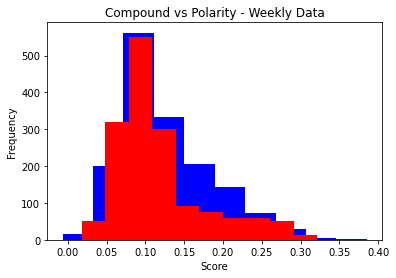

In [68]:
# Plot compound & polarity values for weekly data
plt.hist(weekly_df['compound'],color='b')
plt.hist(weekly_df['TB_polarity'],color='r')
plt.title('Compound vs Polarity - Weekly Data')
plt.xlabel('Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

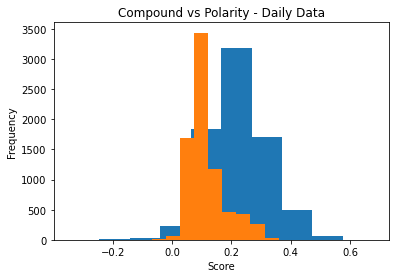

In [69]:
# Plot compound & polarity values for daily data
plt.hist(daily_df['compound'],color='b')
plt.hist(daily_df['TB_polarity'],color='r')
plt.title('Compound vs Polarity - Daily Data')
plt.xlabel('Score')
plt.ylabel('Frequency')

In [26]:
# Create dataframes for company and date frequency 
# Apple
apple_weekly_df = weekly_df[weekly_df['ticker_symbol']=='AAPL']
apple_daily_df = daily_df[daily_df['ticker_symbol']=='AAPL']

# Microsoft
msft_weekly_df = weekly_df[weekly_df['ticker_symbol']=='MSFT']
msft_daily_df = daily_df[daily_df['ticker_symbol']=='MSFT']

# Tesla
tsla_weekly_df = weekly_df[weekly_df['ticker_symbol']=='TSLA']
tsla_daily_df = daily_df[daily_df['ticker_symbol']=='TSLA']

# Google
goog_weekly_df = weekly_df[weekly_df['ticker_symbol']=='GOOGL']
goog_daily_df = daily_df[daily_df['ticker_symbol']=='GOOGL']

# Amazon
amzn_weekly_df = weekly_df[weekly_df['ticker_symbol']=='AMZN']
amzn_daily_df = daily_df[daily_df['ticker_symbol']=='AMZN']


In [99]:
# Plot each company's stock price vs compound
def plot_stock_compound(df,company):
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(df['post_date'],df['close_value'],color='red')
    ax.set_xlabel("Date")
    ax.set_ylabel('Close Value ($)')
    ax.yaxis.label.set_color('red')
    ax2 = ax.twinx()
    ax2.plot(df['post_date'],df['compound'],color='blue')
    ax2.set_ylabel('Vader Compound')
    ax2.yaxis.label.set_color('blue')
    ax.locator_params(axis='x',numticks=4)
    plt.title("{} Stock Price vs Compound".format(company))
    #plt.xticks(np.arange(min(df['post_date']), max(df['post_date'])+1, 3))
    # Define the date format
    #date_form = DateFormatter("%m/%Y")
    #ax.xaxis.set_major_formatter(date_form)
    # Ensure ticks fall once every other week (interval=2) 
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    plt.show()
    


<ipython-input-99-769417fcd9ff>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(axis='x',numticks=4)


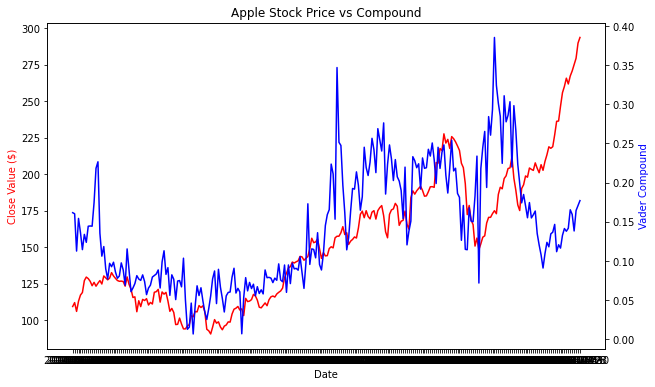

In [100]:
#Plot Apple
plot_stock_compound(apple_weekly_df,'Apple')

<ipython-input-77-ec8a9585098b>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(axis='x',numticks=4)


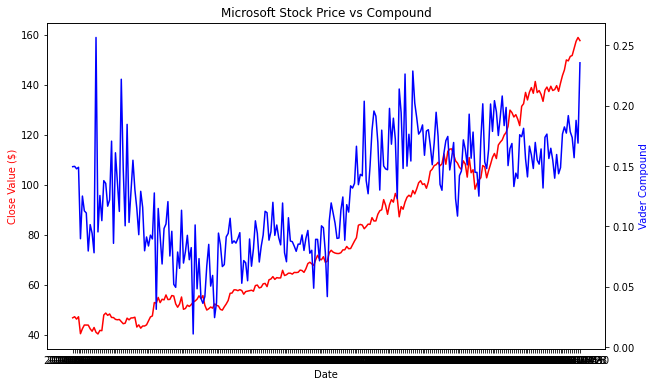

In [79]:
#Plot Microsoft
plot_stock_compound(msft_weekly_df,'Microsoft')

<ipython-input-77-ec8a9585098b>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(axis='x',numticks=4)


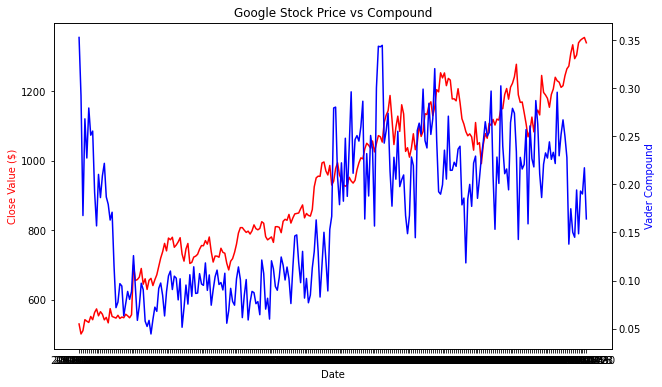

In [80]:
#Plot Google
plot_stock_compound(goog_weekly_df,'Google')

<ipython-input-77-ec8a9585098b>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(axis='x',numticks=4)


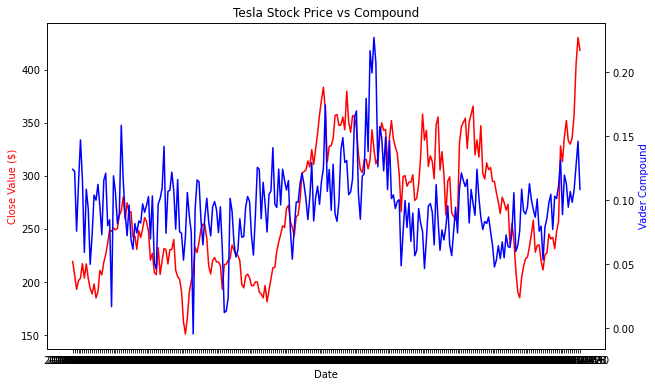

In [81]:
#Plot Tesla
plot_stock_compound(tsla_weekly_df,'Tesla')

<ipython-input-77-ec8a9585098b>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(axis='x',numticks=4)


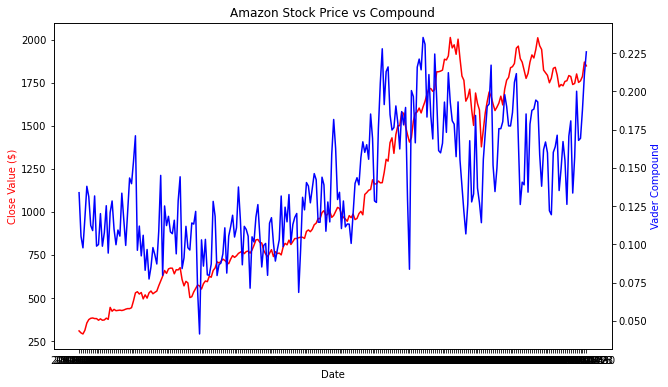

In [82]:
#Plot Amazon
plot_stock_compound(amzn_weekly_df,'Amazon')

In [33]:
# Plot each company's stock price vs TB polarity
def plot_stock_polarity(df,company):
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(df['post_date'],df['close_value'],color='red')
    ax.set_xlabel("Date")
    ax.set_ylabel('Close Value ($)')
    ax.yaxis.label.set_color('red')
    ax2 = ax.twinx()
    ax2.plot(df['post_date'],df['TB_polarity'],color='blue')
    ax2.set_ylabel('TB Polarity')
    ax2.yaxis.label.set_color('blue')
    plt.locator_params(axis='x',numticks=16)
    plt.title("{} Stock Price vs TB Polarity".format(company))
    plt.show()

<ipython-input-33-9b4307b8ebfd>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',numticks=16)


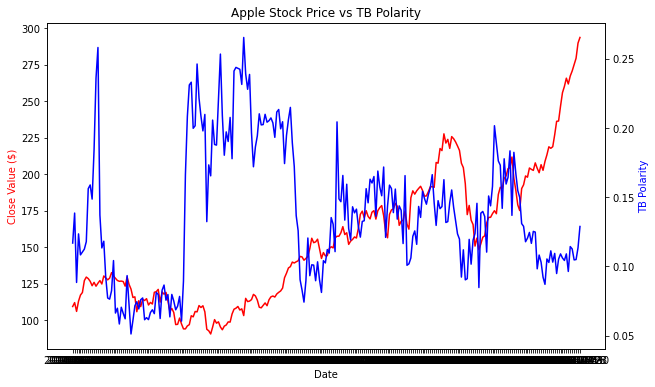

In [34]:
#Plot Apple
plot_stock_polarity(apple_weekly_df,'Apple')

<ipython-input-33-9b4307b8ebfd>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',numticks=16)


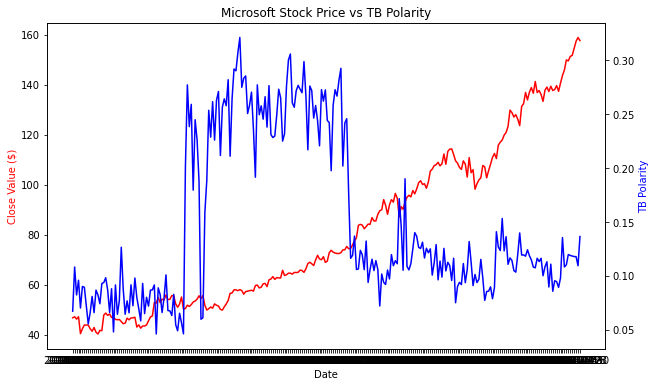

In [35]:
#Plot Microsoft
plot_stock_polarity(msft_weekly_df,'Microsoft')

<ipython-input-33-9b4307b8ebfd>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',numticks=16)


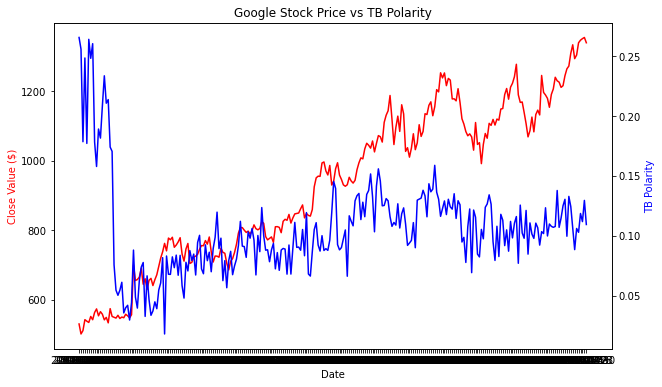

In [36]:
#Plot Google
plot_stock_polarity(goog_weekly_df,'Google')

<ipython-input-33-9b4307b8ebfd>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',numticks=16)


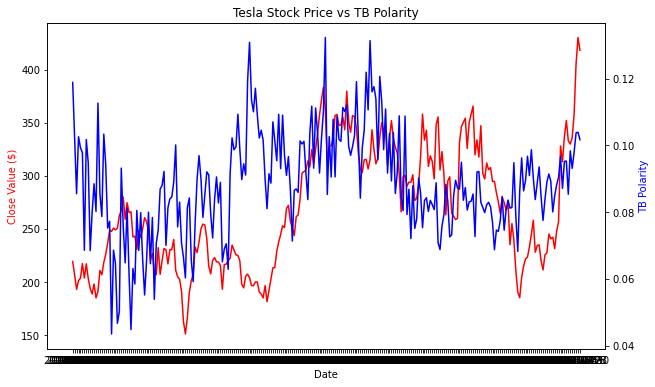

In [37]:
#Plot Tesla
plot_stock_polarity(tsla_weekly_df,'Tesla')

<ipython-input-33-9b4307b8ebfd>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',numticks=16)


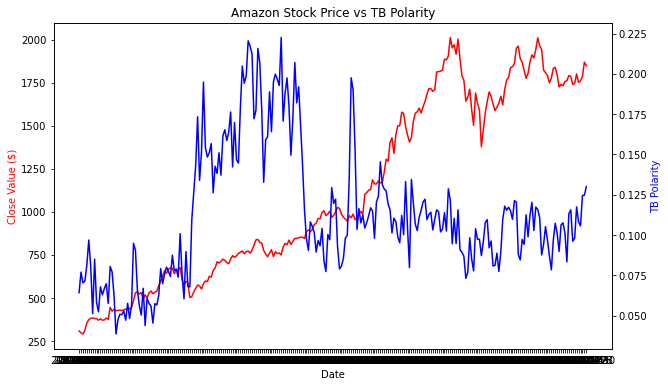

In [38]:
#Plot Amazon
plot_stock_polarity(amzn_weekly_df,'Amazon')